# Kütüphaneleri Yükleme

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats  
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.stats.multicomp import MultiComparison

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Setini Yükleme

In [2]:
df_anova = pd.read_excel("sinav_grup.xlsx")
df_anova.head()

,school,talent,grade
0,1,2,4
1,3,9,9
2,2,9,5
3,1,3,4
4,1,3,3


In [242]:
df_anova.describe().T

,count,mean,std,min,25%,50%,75%,max
school,1200.0,1.983333,0.829837,1.0,1.0,2.0,3.0,3.0
talent,1200.0,5.255000,2.754929,1.0,3.0,5.0,8.0,10.0
grade,1200.0,5.296667,2.757110,1.0,3.0,5.0,8.0,10.0


# Varsayım 1: Verilerin Normal Dağılıma Uyması
##### Ho: Verilerin dağılımı ile Normal Dağılım arasında fark yoktur.(Veriler normal dağılıma uygundur.)
##### Ha: Verilerin dağılımı ile Normal Dağılım arasında fark vardır.(Veriler normal dağılıma uygun değildir.)

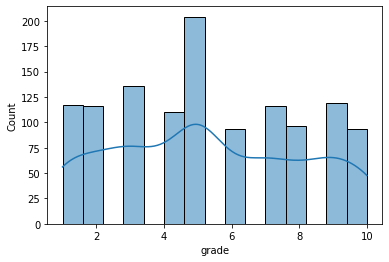

In [235]:
sns.histplot(data=df_anova, x='grade', bins=15, kde=True)
plt.show()

In [5]:
print(stats.shapiro(df_anova["grade"]))

ShapiroResult(statistic=0.9428470730781555, pvalue=4.089836211229324e-21)


p=4.08e-21 olması sebebiyle H0 red, %95 güvenilirlikle veriler normal dağılıma uygun değildir.

# Varsayım 2: Varyansların Homojenliği
##### Ho: Varyanslar arasında fark yoktur.(Varyanslar homojendir.)
##### Ha: Varyanslar fark vardır.(Varyanslar homojen değildir.)

In [6]:
stats.levene(df_anova['grade'][df_anova['school'] == 1],
             df_anova['grade'][df_anova['school'] == 2],
             df_anova['grade'][df_anova['school'] == 3])

LeveneResult(statistic=137.1999477708229, pvalue=2.2517106122853616e-54)

 p=2.5e-54 olması sebebiyle H0 reddedilir. %95 güvenilirlikle varyanslar homojen değildir.

# ANOVA
##### Ho: Sınıfların not ortalamaları arasında farklılık yoktur.
##### Ha: Sınıfların not ortalamaları arasında farklılık vardır.

In [7]:
anova = stats.f_oneway(df_anova['grade'][df_anova['school'] == 1],
             df_anova['grade'][df_anova['school'] == 2],
             df_anova['grade'][df_anova['school'] == 3])

In [8]:
print(anova)

F_onewayResult(statistic=474.2838856870535, pvalue=2.0479538637988e-152)


p=0.00 olması sebebiyle H0 reddedilir. %95 güvenilirlikle grup ortalamaları arasında fark vardır.

# Çoklu Karşılaştırma Testi

In [9]:
kars = MultiComparison(df_anova["grade"], df_anova["school"])    
kars_sonuc = kars.tukeyhsd()
print(kars_sonuc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2    4.463 0.001  4.1197  4.8063   True
     1      3   2.6265 0.001  2.2898  2.9632   True
     2      3  -1.8365 0.001 -2.1838 -1.4892   True
---------------------------------------------------


Bu test sonucunda her bir grup arasındaki ortalamaların farklı olduğu görülüyor. 
1. grubun not ortalamaları; 2. gruba göre 4.4  daha yüksek iken 3. gruba 2.6 daha yüksektir. 
2. grubun ise 3. gruba göre not ortalamları -1.8 daha azdır.

# ANCOVA

İki veya daha fazla grupta, bir bağımlı değişkenin ortalamalarının karşılaştırılmasında bağımlı değişkeni etkileyen başka bir  değişkenin etkisinin varlığı

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns

In [13]:
df=df_anova

## Doğrusal İlişki Varsayımı

Covariate değişken ile bağımlı değişken arasında doğrusal bir ilişki olmalıdır. 

In [218]:
X = df.drop(["grade", "school"], axis=1)
y = df["grade"]

In [219]:
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()

In [220]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     906.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.08e-148
Time:                        11:20:17   Log-Likelihood:                -2581.3
No. Observations:                1200   AIC:                             5167.
Df Residuals:                    1198   BIC:                             5177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8456      0.129     14.258      0.000       1.592       2.100
talent         0.6567      0.022     30.100      0.000       0.614       0.700
==============================================================================
Omnibus:                       48.988   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.032
Skew:                           0.199   Prob(JB):                     1.35e-06
Kurtosis:                       2.381   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model anlamlıdır (p<0.05). Matematiksel yetenek (covariate) ile not (bağımlı değişken) arasında doğrusal bir ilişki vardır.
##### not = 1.85 + 0.66*yetenek

<AxesSubplot:>

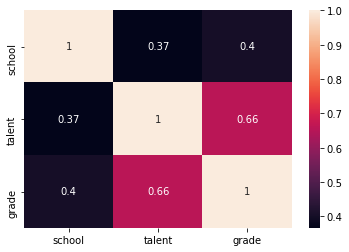

In [129]:
sns.heatmap(df.corr(), annot=True)

## Regresyonların Homojenliği

Covariate ile bağımlı değişken arasındaki ilişkinin gücü ve yönü her grupta benzer olmalıdır.
Her bir grupta covariate ile bağımlı değişken arasındaki ilişkide bağımsız değişken anlamsız olmalıdır. 

In [221]:
X = df.drop(["grade"], axis=1)
y = df["grade"]
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()

In [222]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     511.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.66e-161
Time:                        11:24:03   Log-Likelihood:                -2548.6
No. Observations:                1200   AIC:                             5103.
Df Residuals:                    1197   BIC:                             5118.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9742      0.165      5.909      0.000       0.651       1.298
school         0.6211      0.076      8.195      0.000       0.472       0.770
talent         0.5881      0.023     25.761      0.000       0.543       0.633
==============================================================================
Omnibus:                       52.857   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.765
Skew:                           0.151   Prob(JB):                     2.54e-06
Kurtosis:                       2.349   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,const,school,talent
vif,7.946378,1.15534,1.15534


In [224]:
df1 = df[df['school'] == 1]
df2 = df[df['school'] == 2]
df3 = df[df['school'] == 3]

In [225]:
X1 = df1.drop(["grade"], axis=1)
y1 = df1["grade"]
X2 = df2.drop(["grade"], axis=1)
y2 = df2["grade"]
X3 = df3.drop(["grade"], axis=1)
y3 = df3["grade"]

In [226]:
from sklearn.linear_model import LinearRegression
X1 = sm.add_constant(X1)
lm1 = sm.OLS(y1,X1)
model1 = lm1.fit()
X2 = sm.add_constant(X2)
lm2 = sm.OLS(y2,X2)
model2 = lm2.fit()
X3 = sm.add_constant(X3)
lm3 = sm.OLS(y3,X3)
model3 = lm3.fit()

In [243]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.293
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0704
Time:                        13:25:06   Log-Likelihood:                -727.24
No. Observations:                 374   AIC:                             1458.
Df Residuals:                     372   BIC:                             1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
school         4.0903      0.196     20.849      0.000       3.705       4.476
talent        -0.0931      0.051     -1.815      0.070      -0.194       0.008
==============================================================================
Omnibus:                      309.780   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.510
Skew:                          -0.056   Prob(JB):                     4.76e-06
Kurtosis:                       1.751   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X1 = df1.drop(["grade","school"], axis=1)
y1 = df1["grade"]
X2 = df2.drop(["grade", "school"], axis=1)
y2 = df2["grade"]
X3 = df3.drop(["grade", "school"], axis=1)
y3 = df3["grade"]

##### Doğru Eğimleri

In [228]:
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df1["talent"], df1["grade"])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df2["talent"], df2["grade"])
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(df3["talent"], df3["grade"])

In [229]:
dict=({"1.Grup Eğim":slope1,"1. Grup sabit": intercept1, "1.Grup anlamlılık": p_value1,
       "2.Grup Eğim":slope2, "2. Grup sabit": intercept2, "2.Grup anlamlılık": p_value2,
       "3.Grup Eğim":slope3, "3. Grup sabit": intercept3, "3.Grup anlamlılık": p_value3})
dict

{'1.Grup Eğim': -0.09136075540759787,
 '1. Grup sabit': 3.3063622430934885,
 '1.Grup anlamlılık': 0.05340416077121136,
 '2.Grup Eğim': -0.09309484193011631,
 '2. Grup sabit': 8.180610746794557,
 '2.Grup anlamlılık': 0.07039863286990276,
 '3.Grup Eğim': 0.667698914441576,
 '3. Grup sabit': 1.9902061985075887,
 '3.Grup anlamlılık': 1.0180892349417317e-56}

Ho: Β1,2,3 = 0 (Regresyon doğrusu önemsizdir.) 


Ha: Β1,2,3 ≠ 0 (Regresyon doğrusu önemlidir.) 
             
H0 reddedilemez.
Regresyon doğruları anlamlı değildir. Her bir grup için covariate ile bağımlı değişken arasındaki ilişki anlamlı bulunmamıştır.

## ANCOVA MODEL

In [230]:
oneway = smf.ols('grade ~ school + talent', df).fit()
print(sm.stats.anova_lm(oneway, typ=2))

               sum_sq      df           F         PR(>F)
school     275.667851     1.0   67.150435   6.408204e-16
talent    2724.447049     1.0  663.653028  8.523624e-117
Residual  4913.958021  1197.0         NaN            NaN


## Hataların Normalliği

Normality test p-value 0.000
Hatalar normal dağılıma uygun değil


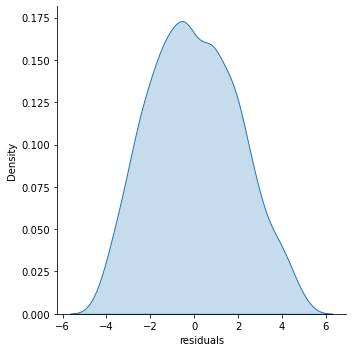

In [123]:
df["residuals"] = oneway.resid
sns.displot(df, x='residuals', kind="kde", fill=True)
print("Normality test p-value %.3f" % sms.jarque_bera(oneway.resid)[1])
print("Hatalar normal dağılıma uygun değil")

Sınıf değişkeninin p değeri <0.05 olduğundan H0 hipotezi reddedilir. 
Farklı sınıfların sınavdan aldıkları notlar, matematiksel yetenekleri de hesaba katıldığında farklılaşmaktadır. 